In [12]:
from sklearn.preprocessing import MinMaxScaler
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]

<h1>Pembagian Dataset</h1>

In [13]:
from sklearn.model_selection import train_test_split
 
X_data = range(10)
y_data = range(10)
 
print("random_state ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42)
    print(y_test)
 
 
print("random_state tidak ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = None)
    print(y_test)


random_state ditentukan
[8, 1, 5]
[8, 1, 5]
[8, 1, 5]
random_state tidak ditentukan
[7, 2, 5]
[8, 0, 9]
[6, 9, 5]


In [14]:
import sklearn
from sklearn import datasets
#load idris dataset
iris = datasets.load_iris()

In [15]:
x = iris.data
y = iris.target

In [17]:
from sklearn.model_selection import train_test_split
 
# membagi dataset menjadi training dan testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
# menghitung panjang/jumlah data pada x_test
len(x_test)

30

<h2>Cross validation</h2>

In [19]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

# membuat model dengan decision tree classifier
clf = tree.DecisionTreeClassifier()
# mengevaluasi performa model dengan cross_val_score
scores = cross_val_score(clf, x, y, cv=5)
scores

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

<h2>Start Sklearn Decision Tree</h2>

In [21]:
import pandas as pd 

#Membaca file iris.csv
iris = pd.read_csv('Iris.csv')
iris.info()
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
# menghilangkan kolom yang tidak penting
iris.drop('Id', axis=1, inplace=True)

In [25]:
#memisahkan atribut dan label
x = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

#membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=123)

In [26]:
from sklearn.tree import DecisionTreeClassifier

#membuat model DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

#melatih model dengan menggunakan data latih
tree_model = tree_model.fit(x_train, y_train)

In [27]:
#evaluasi model
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(x_test)

acc_score = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy score:', acc_score)

Accuracy score: 0.933


In [28]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

Iris-virginica


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [29]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)

<h2>Start SKLearn Linear Regression</h2>

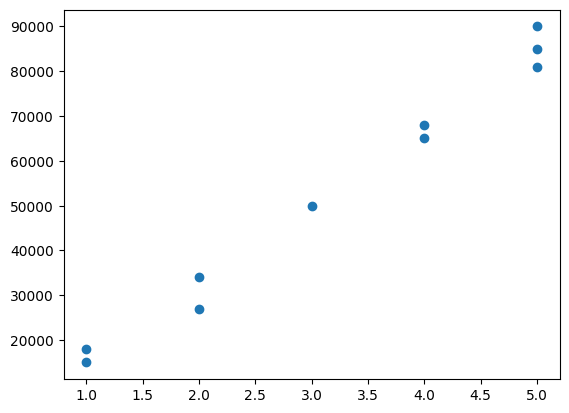

In [30]:
import numpy as np

#membuat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])

#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000, 85000, 90000])

#menampilkan scatterplot dari dataset
import matplotlib.pyplot as pl
%matplotlib inline

pl.scatter(bedrooms, house_price)

In [31]:
from sklearn.linear_model import LinearRegression

#latih model dengan Linier Regression
bedrooms = bedrooms.reshape(-1,1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

LinearRegression()

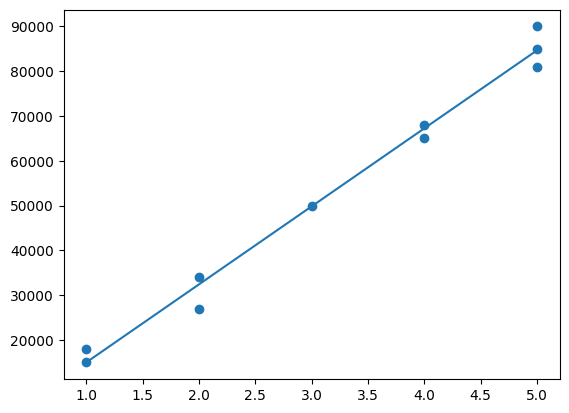

In [32]:
#menampilkan plot hubungan antara jumlah dengan harga rumah
pl.scatter(bedrooms, house_price)
pl.plot(bedrooms, linreg.predict(bedrooms))

<h2>Start SKLearn Logistic Regression</h2>

In [33]:
import pandas as pd

#membace dataset dan mengubahnya menjadi dataframe
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [35]:
#drop kolom yang tidak diperlukan 
data =  df.drop(columns=['User ID'])

#jalankan proses one-hot encoding dg pd.get_dummies
data = pd.get_dummies(data)
data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,False,True
1,35,20000,0,False,True
2,26,43000,0,True,False
3,27,57000,0,True,False
4,19,76000,0,False,True
...,...,...,...,...,...
395,46,41000,1,True,False
396,51,23000,1,False,True
397,50,20000,1,True,False
398,36,33000,0,False,True


In [36]:
#pisahkan atrribut dan label
predictions = ['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']

x = data[predictions]
y = data['Purchased']

In [37]:
#lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)
scaled_data = pd.DataFrame(scaled_data, columns= x.columns)
scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [39]:
from sklearn.model_selection import train_test_split

#bagi data menjadi train dan test untuk setiap atribut dan label
x_train, x_test, y_train, y_test = train_test_split(scaled_data,y, test_size=0.2, random_state=1)

In [40]:
from sklearn import linear_model

#latih model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [43]:
#uji akurasi 
print("accuracy score : ", model.score(x_test, y_test))

accuracy score :  0.825


<h2>Start SKLearn K-means </h2>

In [44]:
import pandas as pd

#ubah file csv menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')

#tampilkan 3 baris pertama
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [45]:
# ubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
 
# ubah data kategorik menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
 
# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [47]:
from sklearn.cluster import KMeans

#menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

Text(0, 0.5, 'Inertia')

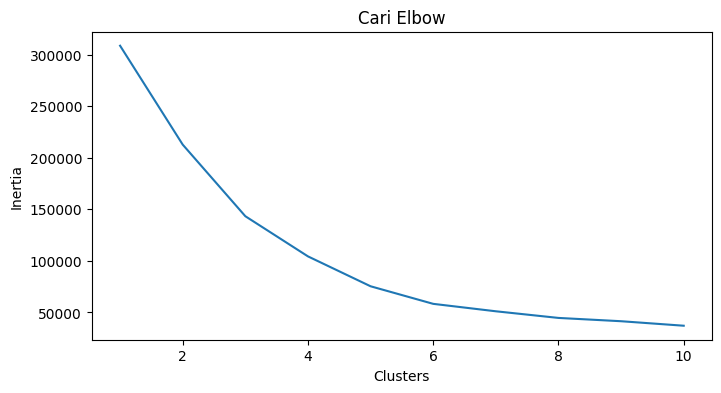

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [ ]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)
 
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()